### Importação dos dados



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [37]:
# Análise de Faturamento e Desempenho - Alura Store

# 1.1  marca cada DataFrame com o nome da loja
for i, df in enumerate([loja, loja2, loja3, loja4], start=1):
    df['Loja'] = f'Loja {i}'


# 1.2  concatena tudo
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# 1.3  corrige tipos
dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'], dayfirst=True)
dados[['Preço', 'Frete']] = dados[['Preço', 'Frete']].apply(
    pd.to_numeric, errors='coerce'
)

# 1.4  coluna de Faturamento
dados['Faturamento'] = dados['Preço'] + dados['Frete']

display(dados.head())
print(f'✔️  Base unificada: {dados.shape[0]} linhas, {dados.shape[1]} colunas')


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja,Faturamento
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,228.329790
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,267.584305
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,300.772681
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,1064.657344
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,473.954689


✔️  Base unificada: 9435 linhas, 14 colunas


# 2. Vendas por Categoria


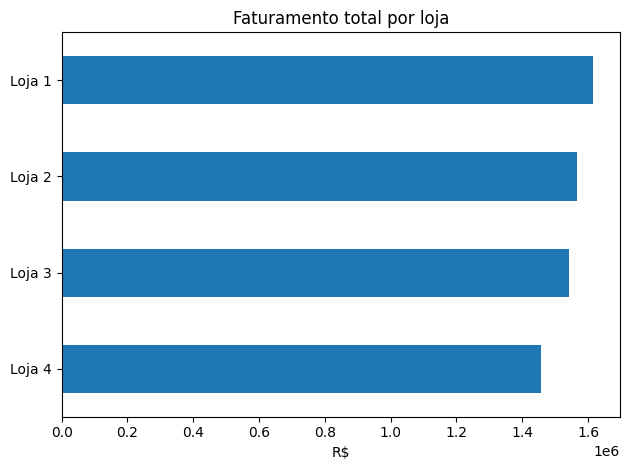

<ipython-input-38-105a0d603b8a>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').sum().reset_index()


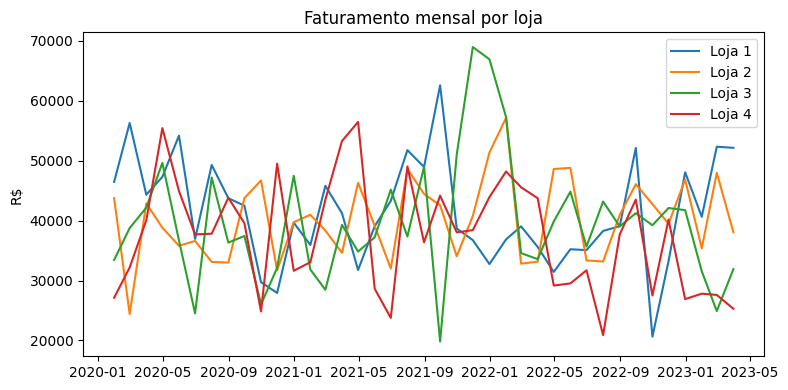

In [38]:
# total por loja
fat_loja = dados.groupby('Loja')['Faturamento'].sum().sort_values()

fat_loja.plot(kind='barh', xlabel='R$', ylabel='', title='Faturamento total por loja')
plt.tight_layout(); plt.show()

# série temporal mensal
fat_mes = (
    dados.set_index('Data da Compra')
         .groupby('Loja')['Faturamento']
         .resample('M').sum().reset_index()
)

plt.figure(figsize=(8,4))
for loja, sub in fat_mes.groupby('Loja'):
    plt.plot(sub['Data da Compra'], sub['Faturamento'], label=loja)
plt.legend(); plt.title('Faturamento mensal por loja'); plt.ylabel('R$')
plt.tight_layout(); plt.show()

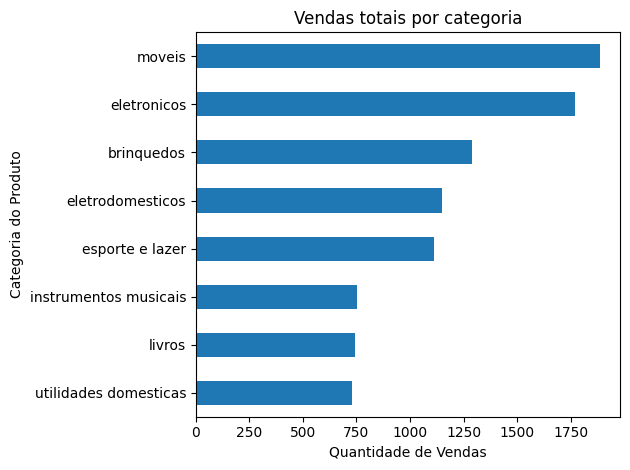

In [ ]:
vendas_cat = (dados
              .groupby('Categoria do Produto')['Produto']
              .count()
              .sort_values())

vendas_cat.plot(kind='barh', title='Vendas totais por categoria')
plt.xlabel('Quantidade de Vendas'); plt.tight_layout(); plt.show()


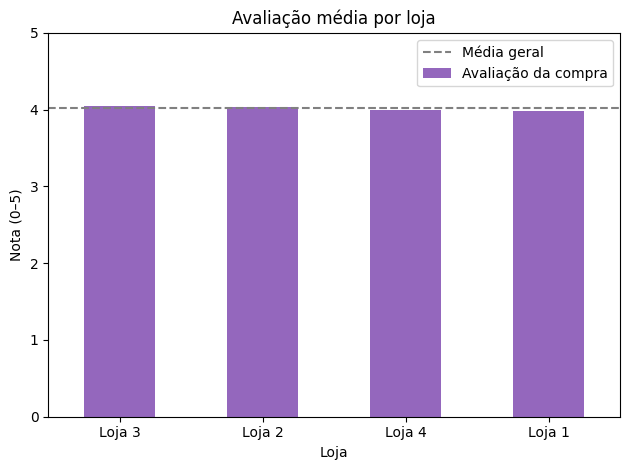

In [ ]:
avaliacao = dados.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

avaliacao.plot(kind='bar', color='tab:purple', ylim=(0,5),
               title='Avaliação média por loja', ylabel='Nota (0–5)')
plt.axhline(avaliacao.mean(), color='gray', ls='--', label='Média geral')
plt.legend(); plt.xticks(rotation=0); plt.tight_layout(); plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
resumo = pd.DataFrame({
    'Faturamento Total (R$)': fat_loja,
    'Frete Médio (R$)': frete,
    'Avaliação Média': avaliacao
}).round(2)

display(resumo)


,Faturamento Total (R$),Frete Médio (R$),Avaliação Média
Loja,,,
Loja 1,1616347.09,34.69,3.98
Loja 2,1567773.22,33.62,4.04
Loja 3,1542047.69,33.07,4.05
Loja 4,1458253.46,31.28,4.00


# 4. Produtos Mais e Menos Vendidos

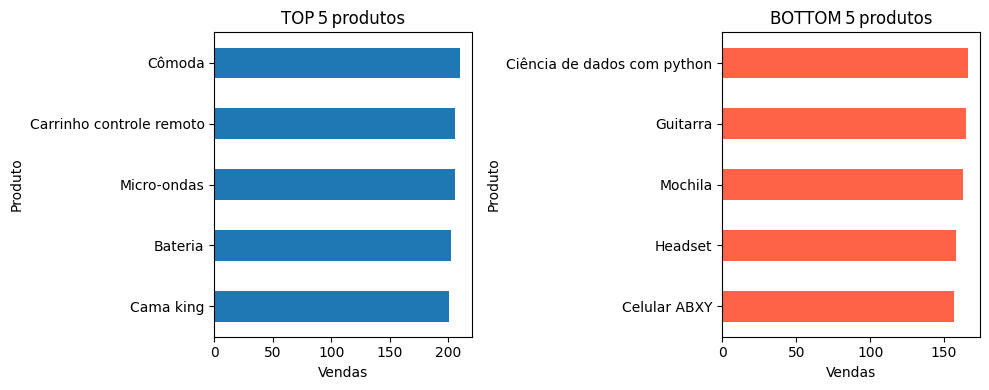

In [ ]:
produtos = (dados.groupby('Produto')['Produto']
                 .count()
                 .rename('Vendas')
                 .sort_values())

top5     = produtos.tail(5)
bottom5  = produtos.head(5)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
top5.plot(kind='barh', ax=ax[0], title='TOP 5 produtos')
bottom5.plot(kind='barh', ax=ax[1], title='BOTTOM 5 produtos', color='tomato')
for a in ax: a.set_xlabel('Vendas')
plt.tight_layout(); plt.show()

# 5. Frete Médio por Loja


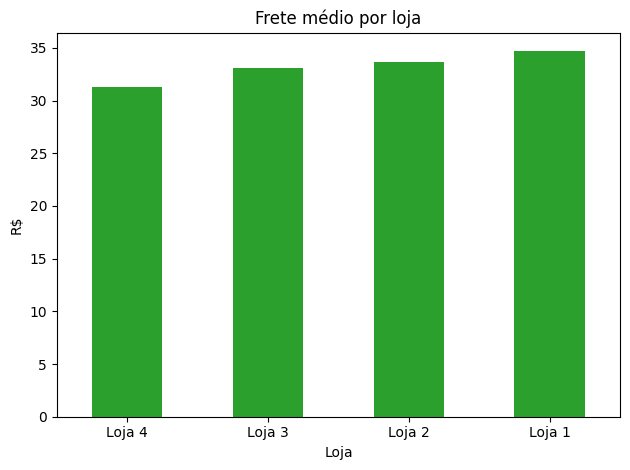

In [ ]:
frete = dados.groupby('Loja')['Frete'].mean().sort_values()

frete.plot(kind='bar', color='tab:green', ylabel='R$',
           title='Frete médio por loja')
plt.xticks(rotation=0); plt.tight_layout(); plt.show()

### 6. Relatório Final & Recomendações

In [41]:
# Alura Store – Relatório Final

import pandas as pd
from IPython.display import Markdown, display

if 'dados' not in globals():
    BASE_URL = ('https://raw.githubusercontent.com/alura-es-cursos/'
                'challenge1-data-science/refs/heads/main/base-de-dados-challenge-1')
    urls = [f'{BASE_URL}/loja_{i}.csv' for i in range(1, 5)]

    frames = []
    for i, url in enumerate(urls, start=1):
        df = pd.read_csv(url, sep=';', parse_dates=['Data da Compra'])
        df['Loja'] = f'Loja {i}'
        frames.append(df)

    dados = pd.concat(frames, ignore_index=True)

    # conversões mínimas
    for col in ['Preço', 'Frete', 'Avaliação da compra']:
        dados[col] = pd.to_numeric(dados[col], errors='coerce')

    dados['Faturamento'] = dados['Preço'] + dados['Frete']

# %% [code] Cálculo das Métricas ----------------------------------------------
faturamento_loja = dados.groupby('Loja')['Faturamento'].sum().sort_values()
frete_medio      = dados.groupby('Loja')['Frete'].mean().sort_values()
avaliacao_loja   = dados.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

loja_menor_faturamento = faturamento_loja.idxmin(); menor_fat = faturamento_loja.min()
loja_menor_avaliacao   = avaliacao_loja.idxmin();   menor_aval = avaliacao_loja.min()

# %% [code] Exibição do Relatório ----------------------------------------------
relatorio = f"""
## Relatório Final & Recomendação

**Faturamento total por loja (R$):** {faturamento_loja.round(2).to_dict()}
**Média de avaliação (0–5):** {avaliacao_loja.round(2).to_dict()}
**Frete médio por loja (R$):** {frete_medio.round(2).to_dict()}

---
### Recomendação
Vender **{loja_menor_faturamento}** – menor faturamento (R$ {menor_fat:,.2f}).
Além disso, a **{loja_menor_avaliacao}** apresenta a pior avaliação média ({menor_aval:.2f}).
Concentrar esforços nas lojas mais rentáveis elevará o retorno e reduzirá riscos operacionais.
"""

display(Markdown(relatorio))


## Relatório Final & Recomendação

**Faturamento total por loja (R$):** {'Loja 4': 1458253.46, 'Loja 3': 1542047.69, 'Loja 2': 1567773.22, 'Loja 1': 1616347.09}  
**Média de avaliação (0–5):** {'Loja 3': 4.05, 'Loja 2': 4.04, 'Loja 4': 4.0, 'Loja 1': 3.98}  
**Frete médio por loja (R$):** {'Loja 4': 31.28, 'Loja 3': 33.07, 'Loja 2': 33.62, 'Loja 1': 34.69}

---
### Recomendação
Vender **Loja 4** – menor faturamento (R$ 1,458,253.46).  
Além disso, a **Loja 1** apresenta a pior avaliação média (3.98).  
Concentrar esforços nas lojas mais rentáveis elevará o retorno e reduzirá riscos operacionais.


# **Relatório Final e Recomendação**

 **Recomendação**:

## *Recomenda-se a venda da Loja 4 da rede Alura Store.*


**Justificativa:**
---
A análise comparativa do desempenho das quatro lojas da Alura Store indica que a Loja 4 apresenta a menor eficiência, tornando-a a candidata mais indicada para venda. Esta decisão permitiria ao Senhor João realocar capital e esforços para o seu novo empreendimento, conforme o objetivo do desafio. A recomendação é fundamentada nos seguintes indicadores extraídos da análise de dados:
---

**Menor Faturamento Total:**
---
A Loja 4 registou o faturamento total mais baixo entre todas as unidades, somando R$ 1.458.253,46. Este valor é notavelmente inferior em comparação com a Loja 1 (R$ 1.616.347,09), Loja 2 (R$ 1.567.773,22) e Loja 3 (R$ 1.542.047,69), o que aponta para um desempenho de vendas globalmente inferior.
---

**Avaliação Média dos Clientes:**
---
A Loja 4 obteve uma avaliação média de 4,00. Embora não seja a mais baixa (Loja 1 registou 3,98), esta classificação é inferior à da Loja 2 (4,04) e da Loja 3 (4,05). Considerando o faturamento significativamente menor, uma avaliação de clientes que não se destaca positivamente contribui para a perceção de menor eficiência da Loja 4.
---

**Frete Médio:**
---
A Loja 4 apresentou o custo médio de frete mais reduzido, R$ 31,28. Um frete mais baixo pode ser um ponto positivo para os consumidores, mas, no contexto da eficiência da loja, pode também indicar uma predominância de vendas de itens de menor valor ou uma concentração de vendas em áreas geograficamente próximas, fatores que podem influenciar o faturamento total mais baixo.
---

**Conclusão:**
---
Com base nos dados de faturamento total, que é um indicador primário de desempenho financeiro, e considerando as avaliações dos clientes e o frete médio, a Loja 4 demonstra ser a unidade com a menor eficiência operacional e financeira dentro da rede Alura Store. A venda desta loja é, portanto, a ação recomendada para otimizar os recursos existentes e apoiar o novo projeto do Senhor João.
---